# Research Question - Can we see any relationship between the Covid-19 cases and biking/thefts in Ottawa and Vancouver

Around March 2020 when Covid-19 hit Canada, many cities had announced lockdowns and banned any kind of gatherings. There was no outdoor activities allowed except walking and biking. Therefore the expectations are increased biking during the lockdowns. The analysis is based on datasets obtainined from the Ottawa City and Vancouver and British Columbia open data.

- Vancouver Bike Theft: https://geodash.vpd.ca/opendata/
- Vancouver Bike Volume: https://vancouver.ca/streets-transportation/how-we-collect-bike-volumes.aspx
- Vancouver Covid Cases: http://www.bccdc.ca/health-info/diseases-conditions/covid-19/data

- Ottawa Bike Tehft:  https://open.ottawa.ca/datasets/ottawa::bicycle-theft-1/about
- Ottawa Bike Volume: https://open.ottawa.ca/documents/f218592c7fe74788906cc6a0eb190af9/about
- Ottawa Covid Cases: https://open.ottawa.ca/datasets/ottawa::covid-19-cases-and-deaths-in-ottawa/about

### Data Cleanup:
- Covid cases data set was cleaned and exported to csv format. /data_sets/Ottawa_CovidCases.csv and /data_sets/Vancouver_CovidCases.csv
- The relevant fields/data were identified and extracted. 
- Removed Nan/null values or replaces 0.


### Exploratory Data Analysis

#### Import Clean datasets    
The cleaned up datasets was read and loaded into dataframes.

#### Statistical Analysis of the data
- The data was filtered for the year 2020 and month number column was added which was used as index later for month wise analysis
- The statistics for the relevant column was obtained by describe function
- Visualized a histogram of the relevant column to observe the spread of data

#### Grouping of Data by Month
- All the data was grouped by month and the sum/average of the relevant column was obtained
- Correlation coeffiecient(st.pearsonr) for various data groups was obtained to determine relationship
- Grouped data for summer months - May to October to observe the trends

#### Visualization of Data
- Line plots and scatter plots were used to observe relationship between Bike Volume vs COVID cases
- Since the variation of data across topics was huge, the plots were done with 2 axes. For example, the left side represent Bike volume and right side represent Covid cases

### Conclusion

There was no strong relationship observed when data was considered across 2020. But some relationships were seen when considering only the summer months from May to October 2020.

![Title](../analysis/CorrValues.png)

In Ottawa, the biking was impacted by Covid. Bike volumes were less when there were more cases.

In Vancouver, the thefts could be seen to increase with increase in covid cases.

Compared to the biking trends of previous years, 2018 and 2019, 2020 also falls in the same pattern. However there is a decrease in the bike volume for 2020.COVID-19 maybe one of the reasons for this trend.
(Ref : /code/data_analysis_BikeTheft_vs_BikeVolume.ipynb)


In [39]:
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import calendar
import datetime as dt
#import seaborn as sns
import numpy as np

In [40]:
#Read data from the required cleaned files
OttBikeRidersDF = pd.read_csv("../data_sets/OTT_BV_2018to2020.csv")
OttCovidDF = pd.read_csv("../data_sets/Ottawa_CovidCases.csv")
VcBikeRidersDF = pd.read_csv("../data_sets/VAC_BV_2018to2020.csv")
VcCovidDF = pd.read_csv("../data_sets/Vancouver_CoivdCases.csv")

### Ottawa - COVID-19 cases vs Bike Volume for 2020

#### Statistical analysis - Ottawa bike volume data

In [41]:
#Adding month number column and get only data for the year 2020
reqOttBikeRidersDF = OttBikeRidersDF[['Date', 'Day of week', 'Day', 'Month', 'Year', 'Total Bike Volume']].copy()
reqOttBikeRidersDF['Date'] = pd.to_datetime(reqOttBikeRidersDF['Date'])
reqOttBikeRidersDF = reqOttBikeRidersDF.loc[(reqOttBikeRidersDF['Year'] == 2020)] 
reqOttBikeRidersDF['Month Number'] = pd.DatetimeIndex(reqOttBikeRidersDF['Date']).month
reqOttBikeRidersDF

,Date,Day of week,Day,Month,Year,Total Bike Volume,Month Number
730,2020-01-01,Wed,1,Jan,2020,1022.0,1
731,2020-01-02,Thu,2,Jan,2020,1535.0,1
732,2020-01-03,Fri,3,Jan,2020,1649.0,1
733,2020-01-04,Sat,4,Jan,2020,1044.0,1
734,2020-01-05,Sun,5,Jan,2020,998.0,1
...,...,...,...,...,...,...,...
1091,2020-12-27,Sun,27,Dec,2020,1965.0,12
1092,2020-12-28,Mon,28,Dec,2020,1376.0,12
1093,2020-12-29,Tue,29,Dec,2020,2005.0,12
1094,2020-12-30,Wed,30,Dec,2020,1387.0,12


In [42]:
#Statistical summary of Total bike volume
reqOttBikeRidersDF['Total Bike Volume'].describe()

count      366.000000
mean      6025.016393
std       4579.778586
min        527.000000
25%       2040.000000
50%       4322.000000
75%       9718.250000
max      19708.000000
Name: Total Bike Volume, dtype: float64

<AxesSubplot:title={'center':'Histogram of bike volume in Ottawa'}, ylabel='Frequency'>

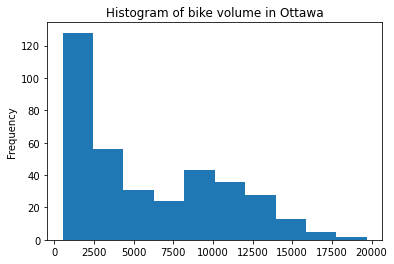

In [5]:
reqOttBikeRidersDF['Total Bike Volume'].plot(kind='hist', title='Histogram of bike volume in Ottawa')

#### Ottawa bike volume grouped by months for 2020

In [6]:
#Get the data grouped by month
bikeDF = reqOttBikeRidersDF.groupby('Month Number').agg(BikeVolume = ('Total Bike Volume', np.mean), Month = ('Month', 'first')) 
bikeDF

,BikeVolume,Month
Month Number,,
1,1611.483871,Jan
2,1558.620690,Feb
3,2443.322581,Mar
4,5087.966667,Apr
5,10526.258065,May
6,12082.366667,Jun
7,10908.258065,Jul
8,9549.354839,Aug
9,8311.033333,Sep


#### Statistical analysis - Ottawa Covid cases

In [7]:
OttCovidDF.head()

,Date,Total_Active_Cases_by_Date,Daily_Cases_by_Reported_Date,Year,Month,Day,Weekday
0,2020-02-10,1,0.0,2020,2,10,Monday
1,2020-02-11,1,0.0,2020,2,11,Tuesday
2,2020-02-12,1,0.0,2020,2,12,Wednesday
3,2020-02-13,1,0.0,2020,2,13,Thursday
4,2020-02-14,1,0.0,2020,2,14,Friday


In [8]:
OttCovidDF['Daily_Cases_by_Reported_Date'].describe()

count    493.000000
mean      55.807302
std       61.371465
min        0.000000
25%       15.000000
50%       40.000000
75%       74.000000
max      403.000000
Name: Daily_Cases_by_Reported_Date, dtype: float64

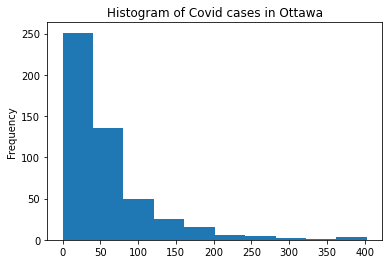

In [9]:
plt.hist(OttCovidDF['Daily_Cases_by_Reported_Date'])
plt.ylabel('Frequency')
plt.title("Histogram of Covid cases in Ottawa")
plt.show()

In [43]:
#Add an empty row for Jan to keep month column consistent with other datasets
OttCovidDF.loc[493] = ['2020-01-01', 0, 0, 2020 ,1, 1, 'Wednesday']
#Add month name to the dataframe
OttCovidDF['Month Name'] = OttCovidDF['Month'].apply(lambda x: calendar.month_abbr[x])

#### Ottawa Covid cases grouped by month for 2020

In [44]:
#Get the data grouped by month
OttGroupedCovidDF = OttCovidDF.loc[OttCovidDF['Year'] == 2020].groupby('Month').agg(TotalCases = ('Daily_Cases_by_Reported_Date' , np.sum), MonthName = ('Month Name', 'first'))
OttGroupedCovidDF

,TotalCases,MonthName
Month,,
1,0.0,Jan
2,0.0,Feb
3,243.0,Mar
4,1185.0,Apr
5,526.0,May
6,145.0,Jun
7,444.0,Jul
8,430.0,Aug
9,1469.0,Sep


#### Line graphs for Covid cases vs Bike volume in Ottawa by months

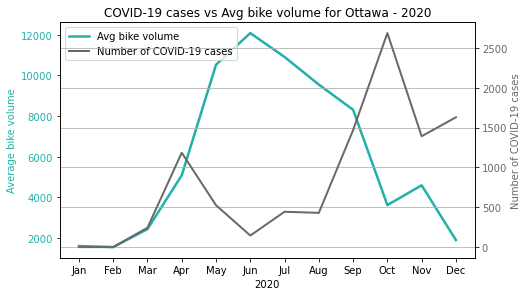

In [45]:
#plotting lines for the covid cases and bike volume
fig, ax1 = plt.subplots()

color = 'lightseagreen'
ax1.set_xlabel('2020')
ax1.set_ylabel('Average bike volume', color=color)
ax1.plot(bikeDF['Month'], bikeDF['BikeVolume'], color=color, linewidth=2.5, label='Avg bike volume')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(OttGroupedCovidDF['MonthName'], OttGroupedCovidDF['TotalCases'], color=color, linewidth=2.0, label='Number of COVID-19 cases')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('COVID-19 cases vs Avg bike volume for Ottawa - 2020')
fig.set_size_inches(8, 4)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc=2)
plt.grid()
plt.savefig("../analysis/OttBikeVolvsCOVID2020.png")
plt.show()

#### Scatter plot for Covid cases vs Bike Volume in Ottawa

The correlation coefficient for bike volume and covid cases is -0.19


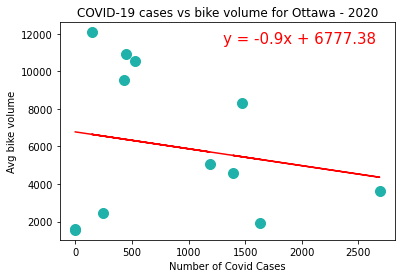

In [46]:
#Scatter plot for covid cases and bike volume
y = bikeDF['BikeVolume']
x = OttGroupedCovidDF['TotalCases']

correlation = st.pearsonr(x, y)
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

plt.scatter(x, y, color='lightseagreen', s=100)
plt.xlabel("Number of Covid Cases")
plt.ylabel("Avg bike volume")
plt.title('COVID-19 cases vs bike volume for Ottawa - 2020')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(1300,11500),fontsize=15,color="red")

plt.savefig("../analysis/OttBikeVolvsCOVID.png")
plt.show()

#### Line graph for Covid cases vs Bike Volume for Ottawa by each day 

In [47]:
#temporary table to include day of year for the covid cases
OttCovidDF['Date'] = pd.to_datetime(OttCovidDF['Date'])
df = OttCovidDF.copy()
df['Day of Year'] = OttCovidDF['Date'].dt.dayofyear
df = df.loc[df['Year'] == 2020]
df = df.loc[df['Day of Year'] > 50]

#temporary table to include day of year for the bike volume
rdf = reqOttBikeRidersDF.copy()
rdf['Day of Year'] = rdf['Date'].dt.dayofyear
rdf = rdf.loc[rdf['Year'] == 2020]
rdf = rdf.loc[rdf['Day of Year'] > 50]


The correlation coefficient for bike volume and covid cases is -0.3


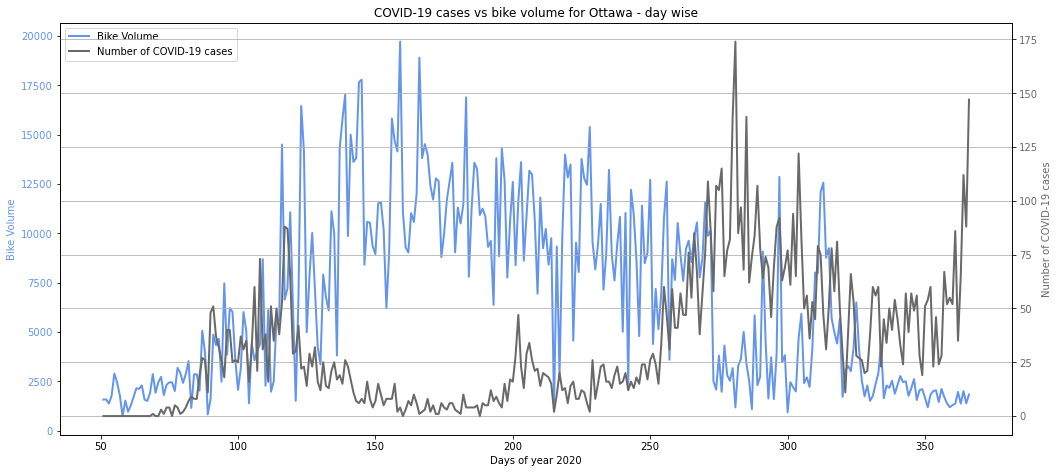

In [15]:
#calculate the correlation
correlation = st.pearsonr(rdf['Total Bike Volume'], df['Daily_Cases_by_Reported_Date'])
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

fig, ax1 = plt.subplots()

color = 'cornflowerblue'
ax1.set_xlabel('Days of year 2020')
ax1.set_ylabel('Bike Volume', color=color)
#ax1.set_facecolor('transparent')
ax1.plot(rdf['Day of Year'], rdf['Total Bike Volume'], color=color, linewidth=2.0, label='Bike Volume')
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Day of Year'], df['Daily_Cases_by_Reported_Date'], color=color, linewidth=2.0, label='Number of COVID-19 cases')
ax2.tick_params(axis='y', labelcolor=color)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=2)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt
plt.title('COVID-19 cases vs bike volume for Ottawa - day wise')
plt.grid()
fig.set_size_inches(18, 7)

#### Ottawa Covid-19 cases vs bike volume for May to October

In [48]:
# Extract data for months May to October
OttGroupedCovidDF1 = OttGroupedCovidDF.iloc[4:10, :]
OttGroupedCovidDF1

,TotalCases,MonthName
Month,,
5,526.0,May
6,145.0,Jun
7,444.0,Jul
8,430.0,Aug
9,1469.0,Sep
10,2687.0,Oct


In [49]:
bikeDF1= bikeDF.iloc[4:10, :]
bikeDF1

,BikeVolume,Month
Month Number,,
5,10526.258065,May
6,12082.366667,Jun
7,10908.258065,Jul
8,9549.354839,Aug
9,8311.033333,Sep
10,3624.419355,Oct


In [50]:
#conducting t-test between 2020 data and May to Oct data
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance

st.ttest_ind(bikeDF["BikeVolume"], bikeDF1["BikeVolume"], equal_var=False)

Ttest_indResult(statistic=-1.8706453419004723, pvalue=0.08383145144419268)

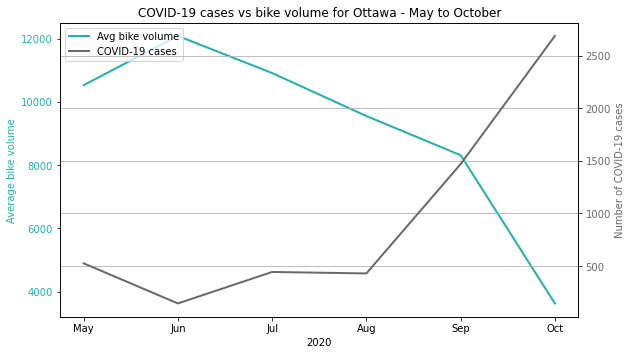

In [51]:
#Line plot for the months May to Oct for Ottawa bike volume vs covid cases
fig, ax1 = plt.subplots()

color = 'lightseagreen'
ax1.set_xlabel('2020')
ax1.set_ylabel('Average bike volume', color=color)
#ax1.set_facecolor('transparent')
ax1.plot(bikeDF1['Month'], bikeDF1['BikeVolume'], color=color, linewidth=2.0, label='Avg bike volume')
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(OttGroupedCovidDF1['MonthName'], OttGroupedCovidDF1['TotalCases'], color=color, linewidth=2.0, label='COVID-19 cases')
ax2.tick_params(axis='y', labelcolor=color)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=2)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt
plt.title('COVID-19 cases vs bike volume for Ottawa - May to October')
plt.grid()
fig.set_size_inches(10, 5)
plt.savefig("../analysis/OttBikeVolvsCovid-MayToOct1.png")

The correlation coefficient for bike volume and covid cases is -0.97


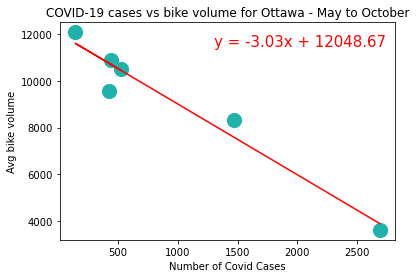

In [20]:
x = OttGroupedCovidDF1['TotalCases']
y = bikeDF1['BikeVolume']

#calculate the correlation
correlation = st.pearsonr(x, y)
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

plt.scatter(x, y, color='lightseagreen', s=200)
plt.xlabel("Number of Covid Cases")
plt.ylabel("Avg bike volume")
plt.title('COVID-19 cases vs bike volume for Ottawa - May to October')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(1300,11500),fontsize=15,color="red")

plt.savefig("../analysis/OttBikeVolvsCovid-MayToOct.png")
plt.show()

### Observation 

The correlation coefficient for bike volume and covid cases in Ottawa by each month is -0.19. This implies that there is no relationship between COVID-19 cases and bike volume for Ottawa. 


The correlation coefficient for each day is -0.3.

The correlation coefficient for May-October is -0.97. This implies that as covid cases increased the bike volume decreased.
This shows that covid could be one of the factors affecting biking Ottawa.

### Vancouver - COVID-19 cases vs Bike Volume 

#### Statistical Analysis - Vancouver bike volume data

In [52]:
reqVcBikerDF = VcBikeRidersDF[['Date', 'Month-NonNumeric', 'Month', 'Year', 'Numeric Date', 'Total Bike Volume']]
reqVcBikerDF = reqVcBikerDF.loc[reqVcBikerDF['Year'] == 2020]
reqVcBikerDF

,Date,Month-NonNumeric,Month,Year,Numeric Date,Total Bike Volume
518,"January 1, 2020",January,1,2020,2020-01-01,20846
519,"January 2, 2020",January,1,2020,2020-01-02,10026
520,"January 3, 2020",January,1,2020,2020-01-03,9830
521,"January 4, 2020",January,1,2020,2020-01-04,14172
522,"January 5, 2020",January,1,2020,2020-01-05,7058
...,...,...,...,...,...,...
879,"December 27, 2020",December,12,2020,2020-12-27,7073
880,"December 28, 2020",December,12,2020,2020-12-28,22423
881,"December 29, 2020",December,12,2020,2020-12-29,10505
882,"December 30, 2020",December,12,2020,2020-12-30,4297


In [53]:
reqVcBikerDF['Total Bike Volume'].describe()

count      366.000000
mean     30792.248634
std      18225.226847
min       1009.000000
25%      15266.000000
50%      27324.000000
75%      45247.750000
max      79803.000000
Name: Total Bike Volume, dtype: float64

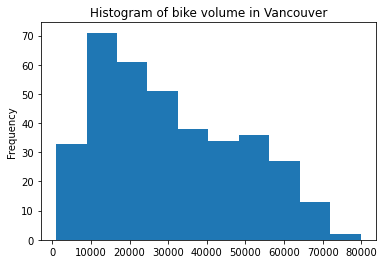

In [54]:
plt.hist(reqVcBikerDF['Total Bike Volume'])
plt.ylabel('Frequency')
plt.title("Histogram of bike volume in Vancouver")
plt.show()

#### Vancouver bike volume grouped by month for 2020

In [55]:
Vc2020BikeDF = reqVcBikerDF.groupby('Month').agg(BikeVolume = ('Total Bike Volume', np.mean), MonthName = ('Month-NonNumeric', 'first'))
Vc2020BikeDF

,BikeVolume,MonthName
Month,,
1,10267.580645,January
2,18197.793103,February
3,26021.129032,March
4,35499.066667,April
5,42856.032258,May
6,41420.766667,June
7,51963.225806,July
8,51389.451613,August
9,36334.966667,September


#### Statistical Analysis - Covid cases in Vancouver

In [56]:
VcCovidDF.head()

,Date,Province,HA,HSDA,Cases_Reported,Cases_Reported_Smoothed,Year,Month,Day,Day of Week
0,2020-01-29,BC,Vancouver Coastal,Vancouver,0,0.0,2020,1,29,Wednesday
1,2020-01-29,BC,Vancouver Island,Central Vancouver Island,0,0.0,2020,1,29,Wednesday
2,2020-01-29,BC,Vancouver Island,North Vancouver Island,0,0.0,2020,1,29,Wednesday
3,2020-01-29,BC,Vancouver Island,South Vancouver Island,0,0.0,2020,1,29,Wednesday
4,2020-01-30,BC,Vancouver Coastal,Vancouver,0,0.0,2020,1,30,Thursday


In [57]:
#Get Data grouped for a given date
VcCovidDF = VcCovidDF.loc[VcCovidDF['Year'] == 2020]
reqVcCodidData = VcCovidDF.groupby('Date')['Cases_Reported'].sum()

In [58]:
reqVcCodidData.describe()

count    338.000000
mean      27.721893
std       35.399369
min        0.000000
25%        2.000000
50%       12.000000
75%       38.000000
max      160.000000
Name: Cases_Reported, dtype: float64

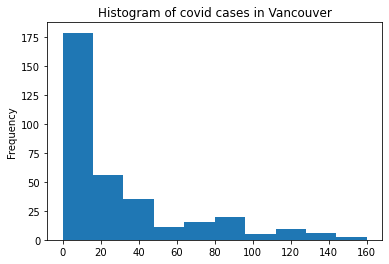

In [59]:
plt.hist(reqVcCodidData)
plt.ylabel('Frequency')
plt.title("Histogram of covid cases in Vancouver")
plt.show()

#### Vancouver covid cases grouped by month for 2020

In [60]:
VcCovidDF['Month Name'] = VcCovidDF['Month'].apply(lambda x: calendar.month_abbr[x])
Vc2020CovidDF = VcCovidDF.groupby('Month').agg(TotalCases = ('Cases_Reported', sum), MonthName = ('Month Name', 'first'))
Vc2020CovidDF

,TotalCases,MonthName
Month,,
1,0,Jan
2,1,Feb
3,357,Mar
4,256,Apr
5,53,May
6,66,Jun
7,139,Jul
8,676,Aug
9,1095,Sep


In [61]:
Vc2020CovidDF1 = Vc2020CovidDF.iloc[4:10, :]
Vc2020CovidDF1

,TotalCases,MonthName
Month,,
5,53,May
6,66,Jun
7,139,Jul
8,676,Aug
9,1095,Sep
10,1099,Oct


In [62]:
Vc2020BikeDF1 = Vc2020BikeDF.iloc[4:10, :]
Vc2020BikeDF1

,BikeVolume,MonthName
Month,,
5,42856.032258,May
6,41420.766667,June
7,51963.225806,July
8,51389.451613,August
9,36334.966667,September
10,25215.354839,October


#### Line graph for Bike Volume vs COVID-19 cases for each month

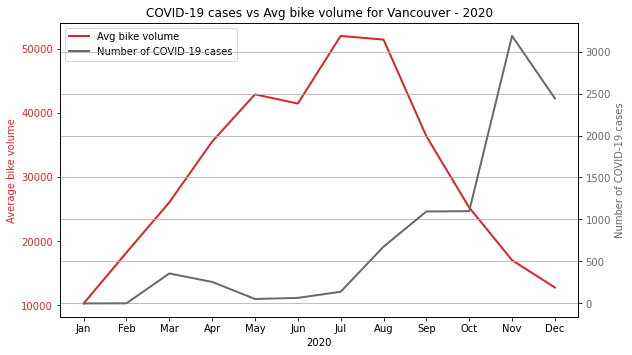

In [63]:
#plotting lines for the covid cases and bike volume
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('2020')
ax1.set_ylabel('Average bike volume', color=color)
ax1.plot(Vc2020BikeDF['MonthName'], Vc2020BikeDF['BikeVolume'], color=color, linewidth=2.0, label="Avg bike volume")
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(Vc2020CovidDF['MonthName'], Vc2020CovidDF['TotalCases'], color=color, linewidth=2.0, label="Number of COVID-19 cases" )
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.title('COVID-19 cases vs Avg bike volume for Vancouver - 2020')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=2)

plt.grid()
fig.set_size_inches(10, 5)
plt.savefig("../analysis/CovidVsBikVol_Vancouver.png")
plt.show()

#### Scatter plot for Bike Volume vs Covid cases for each month

The correlation coefficient for bike volume and covid cases is -0.18


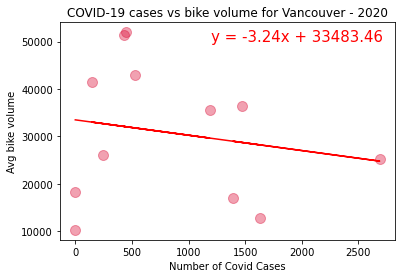

In [64]:
#Scatter plot for covid cases and bike volume
y = Vc2020BikeDF['BikeVolume']
x = OttGroupedCovidDF['TotalCases']

correlation = st.pearsonr(x,y)
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

plt.scatter(x, y, color='crimson', s=100, alpha=0.4)
plt.xlabel("Number of Covid Cases")
plt.ylabel("Avg bike volume")
plt.title('COVID-19 cases vs bike volume for Vancouver - 2020')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-", color='red')
plt.annotate(line_eq,(1200,50000),fontsize=15,color="red")

plt.savefig("../analysis/VcBikeVolvsCOVID.png")
plt.show()

#### Line plots for Covid-19 cases vs bike volume for Vancouver - May to October

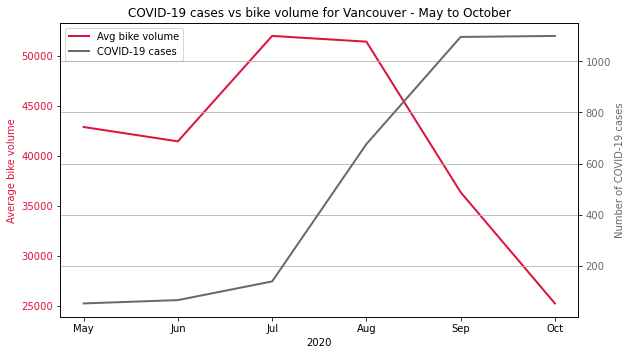

In [34]:
#Line plot for the months May to Oct for Vancouver bike volume vs covid cases
fig, ax1 = plt.subplots()

color = 'crimson'
ax1.set_xlabel('2020')
ax1.set_ylabel('Average bike volume', color=color)
#ax1.set_facecolor('transparent')
ax1.plot(Vc2020BikeDF1['MonthName'], Vc2020BikeDF1['BikeVolume'], color=color, linewidth=2.0, label='Avg bike volume')
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(Vc2020CovidDF1['MonthName'], Vc2020CovidDF1['TotalCases'], color=color, linewidth=2.0, label='COVID-19 cases')
ax2.tick_params(axis='y', labelcolor=color)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=2)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt
plt.title('COVID-19 cases vs bike volume for Vancouver - May to October')
plt.grid()
fig.set_size_inches(10, 5)
plt.savefig("../analysis/VcBikeVolvsCovid-MayToOct1.png")

#### Scatter plot for Covid cases vs bike volume for Vancouver - May to October

The correlation coefficient for bike volume and covid cases is -0.61


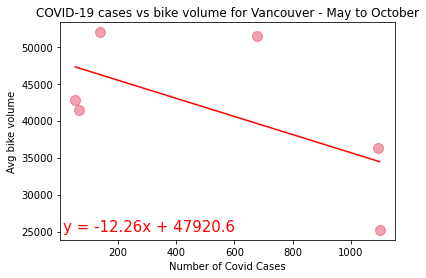

In [65]:
#Scatter plot for covid cases and bike volume
y = Vc2020BikeDF1['BikeVolume']
x = Vc2020CovidDF1['TotalCases']

correlation = st.pearsonr(x,y)
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

plt.scatter(x, y, color='crimson', s=100, alpha=0.4)
plt.xlabel("Number of Covid Cases")
plt.ylabel("Avg bike volume")
plt.title('COVID-19 cases vs bike volume for Vancouver - May to October')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-", color='red')
plt.annotate(line_eq,(10,25000),fontsize=15,color="red")

plt.savefig("../analysis/VcBikeVolvsCOVID_MayToOct.png")
plt.show()

### Observation

The correlation coefficient for bike volume and covid cases for Vancouver for 2020 is -0.18. This implies that there is no relationship between COVID-19 cases and bike riders on road for Vancouver.

The same for months May-October is -0.61. This implies the trend towards the decrease in bike volume with increase in covid cases.

## Ottawa - Covid-19 cases vs bike thefts

In [66]:
OttawaBikeTheft = pd.read_csv("../data_sets/o_theft_clean.csv")
OttawaBikeTheft['Incident_StartDate'] = pd.to_datetime(OttawaBikeTheft['Incident_StartDate'])
OttawaBikeTheft['Month Name'] = OttawaBikeTheft['MONTH'].apply(lambda x: calendar.month_abbr[x])
OttawaBikeTheft.head()                              

,Incident_StartDate,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG,Month Name
0,2018-05-17,2018,5,17,Thursday,362989.6811,5015885.441,45.283108,-76.746999,May
1,2018-06-15,2018,6,15,Friday,363095.6819,5015986.442,45.284038,-76.745676,Jun
2,2018-09-20,2018,9,20,Thursday,362193.6729,5014083.423,45.266740,-76.756644,Sep
3,2019-05-06,2019,5,6,Monday,362524.6789,5016024.441,45.284268,-76.752964,May
4,2019-05-13,2019,5,13,Monday,362132.6740,5014518.427,45.270641,-76.757542,May


#### Ottawa bike thefts grouped by months

In [68]:
#Get the theft data grouped by month for year 2020
OttTheftDF2020 = OttawaBikeTheft.loc[OttawaBikeTheft['YEAR'] == 2020].groupby('MONTH').agg(Thefts = ('DAY', 'count'), MonthName = ('Month Name', 'first'))
OttTheftDF2020

,Thefts,MonthName
MONTH,,
1,13,Jan
2,7,Feb
3,23,Mar
4,69,Apr
5,76,May
6,134,Jun
7,177,Jul
8,144,Aug
9,121,Sep


In [69]:
#Filtering data for May to Oct
OttTheftDF1 = OttTheftDF2020.iloc[4:10, :]
OttTheftDF1

,Thefts,MonthName
MONTH,,
5,76,May
6,134,Jun
7,177,Jul
8,144,Aug
9,121,Sep
10,115,Oct


In [72]:
#Theft vs Covid cases for 2020 in Ottawa
correlation = st.pearsonr(OttTheftDF2020['Thefts'], OttGroupedCovidDF['TotalCases'])
print(f"The correlation coefficient for bike volume and covid cases for 2020 is {round(correlation[0],2)}")

The correlation coefficient for bike volume and covid cases for 2020 is 0.15


#### Line graph for number of bike thefts and covid cases for Ottawa

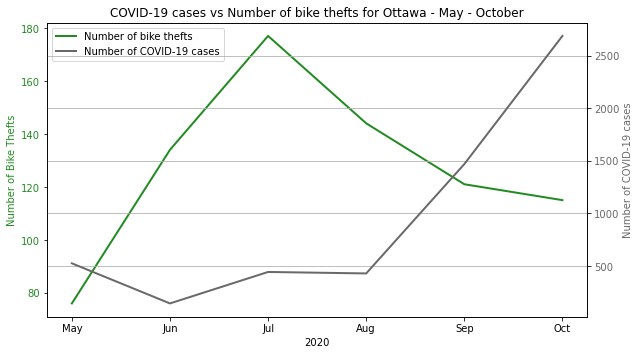

In [73]:
#plotting lines for the covid cases and number of bike thefts
#calculate the correlation

fig, ax1 = plt.subplots()

color = 'forestgreen'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of Bike Thefts', color=color)
ax1.plot(OttTheftDF1['MonthName'], OttTheftDF1['Thefts'], color=color, linewidth=2.0, label='Number of bike thefts')
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(OttGroupedCovidDF1['MonthName'], OttGroupedCovidDF1['TotalCases'], color=color, linewidth=2.0, label='Number of COVID-19 cases')
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.title('COVID-19 cases vs Number of bike thefts for Ottawa - May - October')
plt.grid()
fig.set_size_inches(10, 5)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=2)
plt.savefig("../analysis/CovidVsBikerThefts_OttawaMay-Oct.png")
plt.show()

The correlation coefficient for bike thefts and covid cases between may and october is -0.26


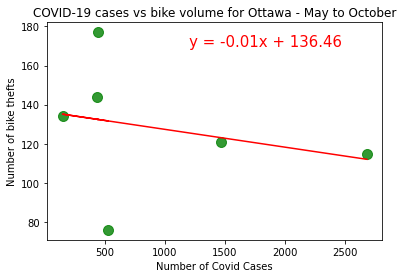

In [74]:
#Scatter plot for covid cases and bike volume
y = OttTheftDF1['Thefts']
x = OttGroupedCovidDF1['TotalCases']

correlation = st.pearsonr(x,y)
print(f"The correlation coefficient for bike thefts and covid cases between may and october is {round(correlation[0],2)}")

plt.scatter(x, y, color='green', s=100, alpha=0.8)
plt.xlabel("Number of Covid Cases")
plt.ylabel("Number of bike thefts")
plt.title('COVID-19 cases vs bike volume for Ottawa - May to October')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-", color='red')
plt.annotate(line_eq,(1200,170),fontsize=15,color="red")

plt.savefig("../analysis/OttBikeTheftvsCOVIDMayOct.png")
plt.show()

### Observation 

The correlation coefficient for bike thefts and covid cases in Ottawa for 2020 is 0.15. The same is -0.26 for May- October. 

This implies that there is no strong relationship between COVID-19 cases and bike thefts for Ottawa.

## Vancouver - COVID-19 cases vs bike thefts

In [75]:
VanBikeThefts = pd.read_csv("..//data_sets/v_theft_clean.csv")
VanBikeThefts['Incident_Date'] = pd.to_datetime(VanBikeThefts['Incident_Date'])
VanBikeThefts['Month Name'] = VanBikeThefts['MONTH'].apply(lambda x: calendar.month_abbr[x])
VanBikeThefts.head()

,Incident_Date,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG,Month Name
0,2018-07-29,2018,7,29,Sunday,491104.2910,5.459077e+06,49.284384,-123.122320,Jul
1,2019-08-05,2019,8,5,Monday,490847.1395,5.458873e+06,49.282539,-123.125851,Aug
2,2019-09-12,2019,9,12,Thursday,490863.9836,5.458842e+06,49.282263,-123.125618,Sep
3,2018-06-03,2018,6,3,Sunday,490903.5756,5.458801e+06,49.281892,-123.125073,Jun
4,2018-06-05,2018,6,5,Tuesday,490903.5756,5.458801e+06,49.281892,-123.125073,Jun


#### Vancouver bike thefts grouped by months 

In [76]:
#Get the theft data grouped by month for year 2020
VanTheftDF = VanBikeThefts.loc[VanBikeThefts['YEAR'] == 2020].groupby('MONTH').agg(Thefts = ('DAY', 'count'), MonthName = ('Month Name', 'first'))
VanTheftDF

,Thefts,MonthName
MONTH,,
1,67,Jan
2,97,Feb
3,108,Mar
4,171,Apr
5,148,May
6,197,Jun
7,243,Jul
8,268,Aug
9,249,Sep


In [77]:
#calculate the correlation
correlation = st.pearsonr(VanTheftDF['Thefts'], Vc2020CovidDF['TotalCases'])
print(f"The correlation coefficient for bike thefts and covid cases for Vancouver 2020 is {round(correlation[0],2)}")

The correlation coefficient for bike thefts and covid cases for Vancouver 2020 is -0.13


In [78]:
VanTheftDF1 = VanTheftDF.iloc[4:10, :]
VanTheftDF1

,Thefts,MonthName
MONTH,,
5,148,May
6,197,Jun
7,243,Jul
8,268,Aug
9,249,Sep
10,223,Oct


#### Line graph for number of bike thefts vs covid cases for Vancouver

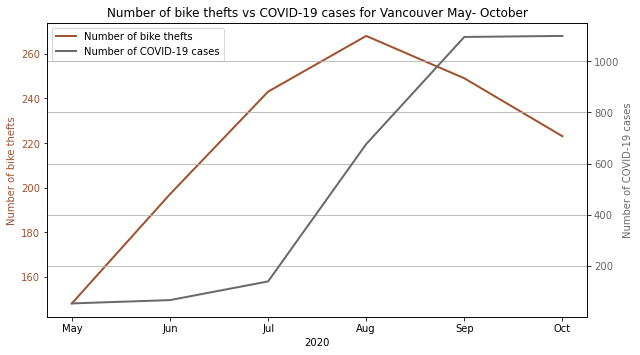

In [79]:

#plotting lines for the covid cases and number of bike thefts
fig, ax1 = plt.subplots()

color = 'sienna'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bike thefts', color=color)
ax1.plot(VanTheftDF1['MonthName'], VanTheftDF1['Thefts'], color=color, linewidth=2.0, label='Number of bike thefts')
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(Vc2020CovidDF1['MonthName'], Vc2020CovidDF1['TotalCases'], color=color, linewidth=2.0, label='Number of COVID-19 cases')
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.title('Number of bike thefts vs COVID-19 cases for Vancouver May- October')
plt.grid()
fig.set_size_inches(10, 5)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=2)
plt.savefig("../analysis/CovidVsBikerThefts_Vancouver.png")
plt.show()

The correlation coefficient for bike thefts and covid cases between may and october is 0.56


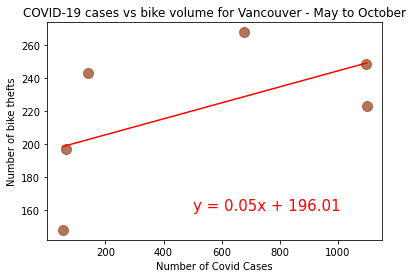

In [80]:
#Scatter plot for covid cases and bike volume
y = VanTheftDF1['Thefts']
x = Vc2020CovidDF1['TotalCases']

correlation = st.pearsonr(x,y)
print(f"The correlation coefficient for bike thefts and covid cases between may and october is {round(correlation[0],2)}")

plt.scatter(x, y, color='sienna', s=100, alpha=0.8)
plt.xlabel("Number of Covid Cases")
plt.ylabel("Number of bike thefts")
plt.title('COVID-19 cases vs bike volume for Vancouver - May to October')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-", color='red')
plt.annotate(line_eq,(500,160),fontsize=15,color="red")

plt.savefig("../analysis/VcBikeTheftvsCOVIDMayOct1.png")
plt.show()

### Observation

The correlation coefficient for bike thefts and covid cases in Vancouver for 2020 is -0.13. It is 0.56 for months May to October.

This implies that there is slight relationship between COVID-19 cases and bike thefts for Vancouver. The thefts tend to increase with the increase in Covid cases.

#### Summary Statistics for all the data

In [82]:
# Get all the data for all the months
OttHeatmapDF = OttTheftDF2020[['MonthName', 'Thefts']].copy()
OttHeatmapDF['Covid Cases'] = OttGroupedCovidDF['TotalCases']
OttHeatmapDF['Bikes Volume'] = bikeDF['BikeVolume']
OttHeatmapDF.describe()

,Thefts,Covid Cases,Bikes Volume
count,12.000000,12.000000,12.000000
mean,80.166667,845.916667,6017.075470
std,57.682254,827.295974,4004.088422
min,7.000000,0.000000,1558.620690
25%,21.750000,218.500000,2308.580645
50%,72.500000,485.000000,4842.716667
75%,124.250000,1411.250000,9793.580645
max,177.000000,2687.000000,12082.366667
